<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/week9/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [141]:
x_train.shape

(50000, 32, 32, 3)

In [82]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

'ship'

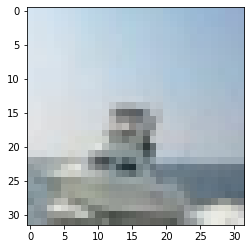

In [142]:
hinh = x_train[100]
import matplotlib.pyplot as plt
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
plt.imshow(hinh,cmap = plt.cm.binary)
a = y_train[100]
plt.show
(classes[int(y_train[100])])


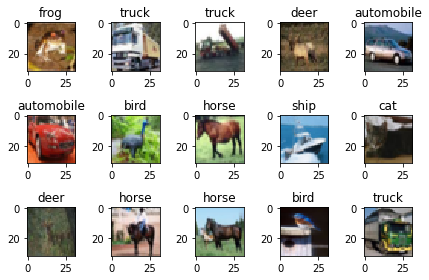

In [143]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('{}'.format(classes[int(y_train[i])]))
  plt.xticks
  plt.yticks

In [144]:
from keras import models
from keras.layers import Dense

In [145]:
from keras.models.cloning import Sequential
model=Sequential()
model.add(Dense(1023,activation='relu',input_shape = (32*32*3,),name='layout1'))
model.add(Dense(900,activation='relu',name='layout2'))
model.add(Dense(784,activation='relu',name='layout3'))
model.add(Dense(512,activation='relu',name='layout4'))
model.add(Dense(256,activation='relu',name='layout5'))
model.add(Dense(10,activation='softmax',name='layoutN'))  # 10 layout
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout1 (Dense)             (None, 1023)              3143679   
                                                                 
 layout2 (Dense)             (None, 900)               921600    
                                                                 
 layout3 (Dense)             (None, 784)               706384    
                                                                 
 layout4 (Dense)             (None, 512)               401920    
                                                                 
 layout5 (Dense)             (None, 256)               131328    
                                                                 
 layoutN (Dense)             (None, 10)                2570      
                                                                 
Total params: 5,307,481
Trainable params: 5,307,481
N

In [146]:
x_train = x_train.reshape((50000,32*32*3)) # đổi đầu vào thành 1 dãy
x_train = x_train.astype('float32')/255.0 # đổi kiểu int sang float
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255.0
print('Original label:', y_train[0])
from keras.utils import to_categorical  # chuyển output sang số 1 nổi, 1 lần  
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
x_train.shape
x_train[0]

print('after one hot',y_train[0])

Original label: [6]
after one hot [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [147]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics= ['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test))


Epoch 1/30
1563/1563 [==============================] - 76s 48ms/step - loss: 1.9360 - accuracy: 0.2838 - val_loss: 1.8405 - val_accuracy: 0.3163
Epoch 2/30
1563/1563 [==============================] - 74s 47ms/step - loss: 1.7583 - accuracy: 0.3618 - val_loss: 1.7152 - val_accuracy: 0.3752
Epoch 3/30
1563/1563 [==============================] - 76s 49ms/step - loss: 1.6742 - accuracy: 0.3966 - val_loss: 1.6205 - val_accuracy: 0.4213
Epoch 4/30
1563/1563 [==============================] - 73s 47ms/step - loss: 1.6126 - accuracy: 0.4200 - val_loss: 1.5821 - val_accuracy: 0.4246
Epoch 5/30
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5703 - accuracy: 0.4370 - val_loss: 1.5902 - val_accuracy: 0.4364
Epoch 6/30
1563/1563 [==============================] - 70s 45ms/step - loss: 1.5376 - accuracy: 0.4469 - val_loss: 1.5862 - val_accuracy: 0.4400
Epoch 7/30
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5030 - accuracy: 0.4597 - val_loss: 1.5543 -

In [148]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('độ chính xác:',test_acc)
print('hàm mất mát',test_loss)

313/313 [==============================] - 3s 10ms/step - loss: 1.8053 - accuracy: 0.4783
độ chính xác: 0.478300005197525
hàm mất mát 1.8052763938903809


In [149]:
model.save('modelCIFAR10.h5')

In [150]:
from keras.models import load_model
model11 = load_model('modelCIFAR10.h5')
model11.summary()
print(model11.predict([x_test]))


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout1 (Dense)             (None, 1023)              3143679   
                                                                 
 layout2 (Dense)             (None, 900)               921600    
                                                                 
 layout3 (Dense)             (None, 784)               706384    
                                                                 
 layout4 (Dense)             (None, 512)               401920    
                                                                 
 layout5 (Dense)             (None, 256)               131328    
                                                                 
 layoutN (Dense)             (None, 10)                2570      
                                                                 
Total params: 5,307,481
Trainable params: 5,307,481
N

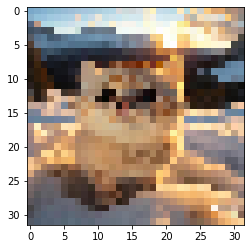

In [151]:
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np

url = r'cat.jpg'
img = load_img(url, target_size=(32, 32))
plt.imshow(img)

In [152]:
model1 = load_model('modelCIFAR10.h5')
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32') / 255
predicted_label = classes[model1.predict(img).argmax()]
print("{}".format(predicted_label))

1/1 [==============================] - 0s 91ms/step
dog
